In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv


In [2]:
df = pd.read_csv("/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv")

In [3]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

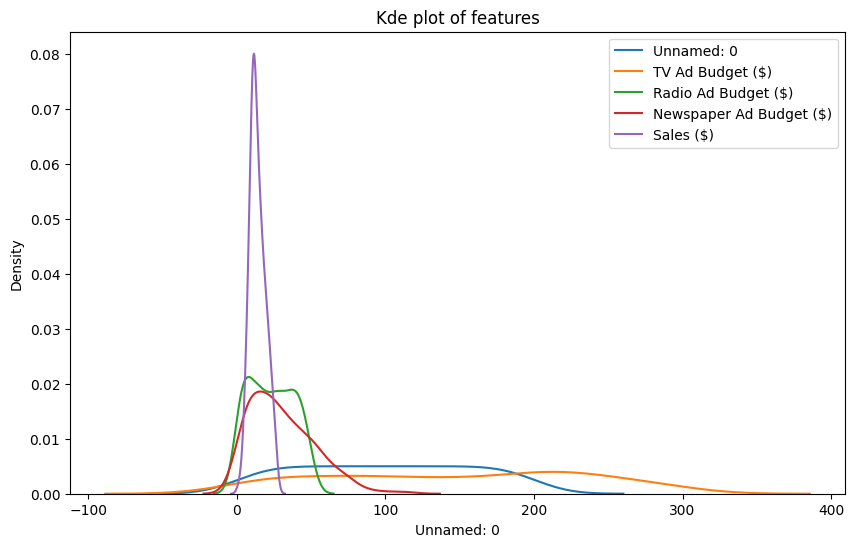

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for col in df.columns:

    sns.kdeplot(df[col],  label = col)

plt.title("Kde plot of features")
plt.legend()
plt.show()

In [8]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

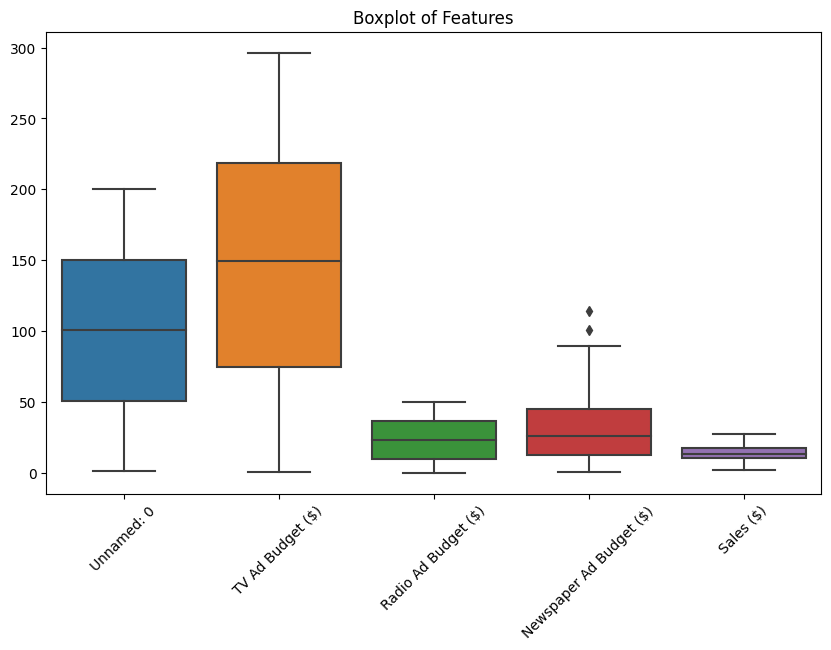

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)

plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()


In [10]:
import statistics

In [11]:
def find_outliers(data):

  outliers = []

  data_std = statistics.stdev(data)
  data_mean = statistics.mean(data)

  cut_off = data_std * 3

  lower_limit = data_mean - cut_off
  upper_limit = data_mean + cut_off

  for datapoint in data:

    if datapoint > upper_limit or datapoint < lower_limit:

      outliers.append(datapoint)

  return outliers

In [12]:
outliers_newspaper_ad = find_outliers(df['Newspaper Ad Budget ($)'])

In [13]:
outliers_newspaper_ad

[114.0, 100.9]

In [14]:
df = df.drop('Unnamed: 0', axis=1)


In [15]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
X = df.drop('Sales ($)', axis = 1)
y = df['Sales ($)']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

In [21]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [23]:
param_grid = {
            "max_depth" : [10, 20, 30, None],
            "min_samples_split" : [2, 5, 10],
            "min_samples_leaf" : [1, 2, 4]
}

In [24]:
model = DecisionTreeRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2, scoring = "neg_mean_squared_error")

grid_search.fit(X_scaled, y_train)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test_scaled)

#print("rmse : ",mean_squared_error(y_test, y_pred)**0.5)

print(grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [25]:
print(y_pred)

[19.  21.2 20.7  6.6 23.8 13.3 22.6  9.7 11.7 14.1  3.2  8.6 12.5  6.6
 10.3 12.6  6.6 16.6 11.4 20.2 20.1 11.8 10.8 23.8  9.9  8.6 22.6 12.2
 10.6  3.2 11.6 10.9 21.2  9.3 15.9 20.1 13.6 20.2 12.4  7.6]


In [26]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales ($), dtype: float64

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
rrmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [28]:
print(f"r2: {r2}, rmse : {rrmse}, mae : {mae}, mape : {mape},  ")

r2: 0.9353210532308286, rmse : 1.4288106942488918, mae : 0.9550000000000001, mape : 8.765937684758123,  


| Metric             | Value   | Meaning                                                                                                                                     |
| ------------------ | ------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **R² (R-squared)** | `0.935` | It means **93.5% of the variance** in sales is explained by your model. Closer to 1 is better.                                   |
| **RMSE**           | `1.43`  | On average, predictions deviate from the true values by **\~1.43 units**. Since sales range from 1.6 to 27, this is a **small error**. |
| **MAE**            | `0.955` | On average, predictions are **\~0.96 units off** from the actual sales values. Lower = better.                                         |
| **MAPE**           | `8.76%` | predictions making less than **9% average relative error**, which is **very good**. MAPE below 10% is usually considered **highly accurate**.    |
